In [12]:
import win32com.client

## Introduction to HECRAS Controller

## Running a steady model

In [13]:
#import os
import win32com.client
import numpy as np
import pandas as pd
#from support import sc1_ShowNodes

In [14]:
#Add obkect mod and open function controller
RC = win32com.client.Dispatch("RAS507.HECRASController")
RC.ShowRas()  

In [15]:
#Open project
RC.Project_Open(r"C:/Users/juan.guerrero/Juan/dev/apuntes/Examenes/Data Examen 3/Ex_4/Model/test02/s7.prj")

In [16]:
#river=RC.Geometry_GetRivers(None, None)
#reach=RC.Geometry_GetReaches(1,None, None)
#nodes=RC.Geometry_GetNodes(1,1,None, None, None)
#nodes=list(nodes)

In [17]:
#Indetify geometry
river=RC.Geometry_GetRivers()[1][0]
reach=RC.Geometry_GetReaches(1)[2][0]
nodes=RC.Geometry_GetNodes(1,1)[3]
nodes=list(nodes)

In [18]:
#Identify coefficient rugosity
Mann_chan=round(np.random.uniform(0.02,0.04),3)
Mann_bank=round(np.random.uniform(0.02,0.04),3)

In [19]:
Mann_chan
#Mann_bank

0.04

In [20]:
for i in range(19):
    Var_Mann=RC.Geometry_SetMann_LChR(None,river,reach,nodes[i],Mann_bank,Mann_chan,Mann_bank)
    print(Var_Mann)

(False, '', 'River 1         ', 'Reach 1         ', 3909.0, 0.03200000151991844, 0.03999999910593033, 'River "" not found')
(False, '', 'River 1         ', 'Reach 1         ', 3665.0, 0.03200000151991844, 0.03999999910593033, 'River "" not found')
(False, '', 'River 1         ', 'Reach 1         ', 3419.0, 0.03200000151991844, 0.03999999910593033, 'River "" not found')
(False, '', 'River 1         ', 'Reach 1         ', 3203.0, 0.03200000151991844, 0.03999999910593033, 'River "" not found')
(False, '', 'River 1         ', 'Reach 1         ', 2988.0, 0.03200000151991844, 0.03999999910593033, 'River "" not found')
(False, '', 'River 1         ', 'Reach 1         ', 2753.0, 0.03200000151991844, 0.03999999910593033, 'River "" not found')
(False, '', 'River 1         ', 'Reach 1         ', 2528.0, 0.03200000151991844, 0.03999999910593033, 'River "" not found')
(False, '', 'River 1         ', 'Reach 1         ', 2330.0, 0.03200000151991844, 0.03999999910593033, 'River "" not found')
(False, 

In [21]:
#Execute model
Simulation=RC.Compute_CurrentPlan(None,None,True)

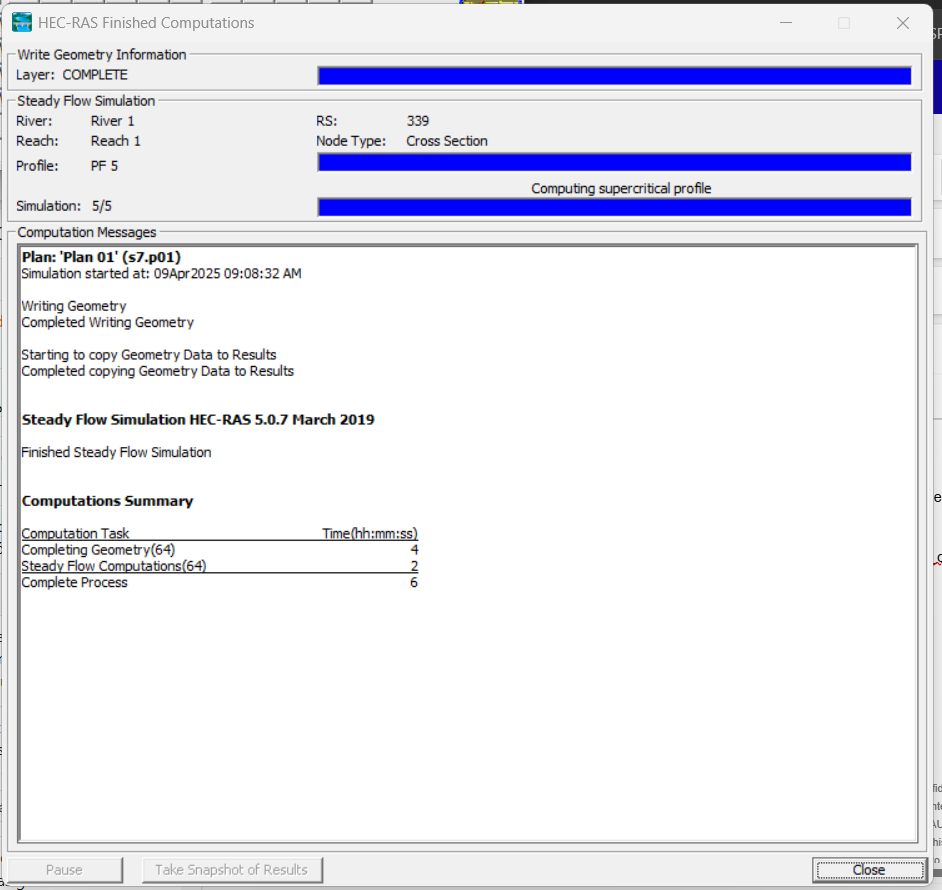

In [22]:
#Extract results
water_list,flow_list,veloc_list =[],[],[]

In [23]:
for i in range(19):
    water=RC.Output_NodeOutput(1,1,i+1,None,1,2)[0]
    flow=RC.Output_NodeOutput(1,1,i+1,None,1,9)[0]
    veloc=RC.Output_NodeOutput(1,1,i+1,None,1,23)[0]
    water_list.append(water),flow_list.append(flow),veloc_list.append(veloc)

In [24]:
water_list

[2447.453125,
 2447.44580078125,
 2447.4453125,
 2447.445068359375,
 2447.431396484375,
 2447.433837890625,
 2447.433837890625,
 2446.689208984375,
 2444.608642578125,
 2444.580810546875,
 2443.955810546875,
 2442.049072265625,
 2441.9326171875,
 2441.4521484375,
 2441.01416015625,
 2440.878662109375,
 2440.78564453125,
 2440.596923828125,
 2440.277587890625]

In [25]:
#Display results of water elevation, flow and velocity
output={'Cross Sections':nodes,'Water Surface Elevation(m)':water_list,'Flow(m³/s)':flow_list,'Velocities(m/s)':veloc_list}
df=pd.DataFrame(output)
df.set_index('Cross Sections')

,Water Surface Elevation(m),Flow(m³/s),Velocities(m/s)
Cross Sections,,,
3909,2447.453125,49.999992,0.177281
3665,2447.445801,49.999992,0.354882
3419,2447.445312,49.999992,0.236047
3203,2447.445068,49.999992,0.158919
2988,2447.431396,49.999992,0.484284
2753,2447.433838,49.999992,0.242952
2528,2447.433838,49.999992,0.159632
2330,2446.689209,49.999992,3.640512
2059,2444.608643,49.999992,0.428950


In [26]:
#Import plot libraries
import matplotlib
import matplotlib.pyplot as plt

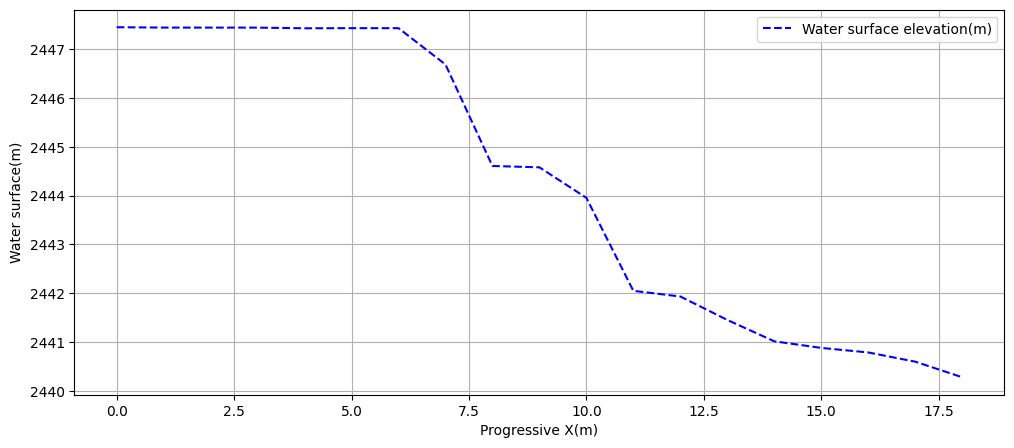

In [27]:
#Plot results
#print("Water surface elevation= ", water_list)
plt.figure(figsize=(12,5))
plt.plot(water_list, linestyle="--", color ="b", label = "Water surface elevation(m)")
plt.grid(True)
plt.xlabel('Progressive X(m)')
plt.ylabel('Water surface(m)')
plt.legend(loc="best")

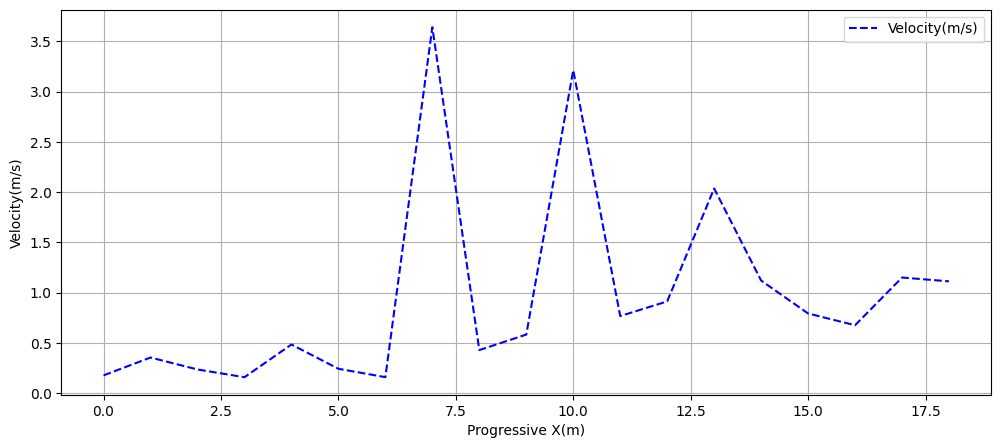

In [28]:
#Plot results
plt.figure(figsize=(12,5))
plt.plot(veloc_list, linestyle="--", color ="b", label = "Velocity(m/s)")
plt.grid(True)
plt.xlabel('Progressive X(m)')
plt.ylabel('Velocity(m/s)')
plt.legend(loc="best")